1.	Importing the libraries Імпорт бібліотек     M: L (+) | Review: A

In [2]:
#Importieren Sie Python-Bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as nsn 
import seaborn as sns

In [3]:
from sklearn import neighbors
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import sklearn
from math import sqrt

In [4]:
#Lesen Sie den Datensatz
master_data=pd.read_csv("master.csv.xls")

In [5]:
#Print the first 5 rows of the dataframe.
master_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Unnamed: 12,Gender
0,Albania,1987,male,15-24 years,21,312900.0,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,NaN,FEMALE
1,Albania,1987,male,35-54 years,16,308000.0,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,NaN,MALE
2,Albania,1987,female,15-24 years,14,289700.0,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,NaN,FEMALE
3,Albania,1987,male,75+ years,1,21800.0,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,NaN,MALE
4,Albania,1987,male,25-34 years,9,274300.0,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,NaN,MALE


2. Checking null values in the dataframe M: L (+) | Review: A

In [6]:
master_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27819 non-null  float64
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9    gdp_for_year ($)   27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
 12  Unnamed: 12         0 non-null      float64
 13  Gender              8 non-null      object 
dtypes: float64(4), int64(3), object(7)
memory usage: 3.0+ MB


3.	Summary of the dataset  M: L (+) | Review: A

In [7]:
master_data.describe()

,year,suicides_no,population,suicides/100k pop,HDI for year,gdp_per_capita ($),Unnamed: 12
count,27820.000000,27820.000000,2.781900e+04,27820.000000,8364.000000,27820.000000,0.0
mean,2001.258375,242.574407,1.844859e+06,12.816097,0.776601,16866.464414,NaN
std,8.469055,902.047917,3.911835e+06,18.961511,0.093367,18887.576472,NaN
min,1985.000000,0.000000,2.780000e+02,0.000000,0.483000,251.000000,NaN
25%,1995.000000,3.000000,9.750750e+04,0.920000,0.713000,3447.000000,NaN
50%,2002.000000,25.000000,4.302000e+05,5.990000,0.779000,9372.000000,NaN
75%,2008.000000,131.000000,1.486196e+06,16.620000,0.855000,24874.000000,NaN
max,2016.000000,22338.000000,4.380521e+07,224.970000,0.944000,126352.000000,NaN


3.	Summary of the dataset  M: L (+) | Review: A

3. Резюме набору даних

In [8]:
master_data.describe().T

,count,mean,std,min,25%,50%,75%,max
year,27820.0,2.001258e+03,8.469055e+00,1985.000,1995.000,2002.000,2008.000,2.016000e+03
suicides_no,27820.0,2.425744e+02,9.020479e+02,0.000,3.000,25.000,131.000,2.233800e+04
population,27819.0,1.844859e+06,3.911835e+06,278.000,97507.500,430200.000,1486195.500,4.380521e+07
suicides/100k pop,27820.0,1.281610e+01,1.896151e+01,0.000,0.920,5.990,16.620,2.249700e+02
HDI for year,8364.0,7.766011e-01,9.336671e-02,0.483,0.713,0.779,0.855,9.440000e-01
gdp_per_capita ($),27820.0,1.686646e+04,1.888758e+04,251.000,3447.000,9372.000,24874.000,1.263520e+05
Unnamed: 12,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


4.	Population of different countries  M: L (+) | Review: A

4. Населення різних країн

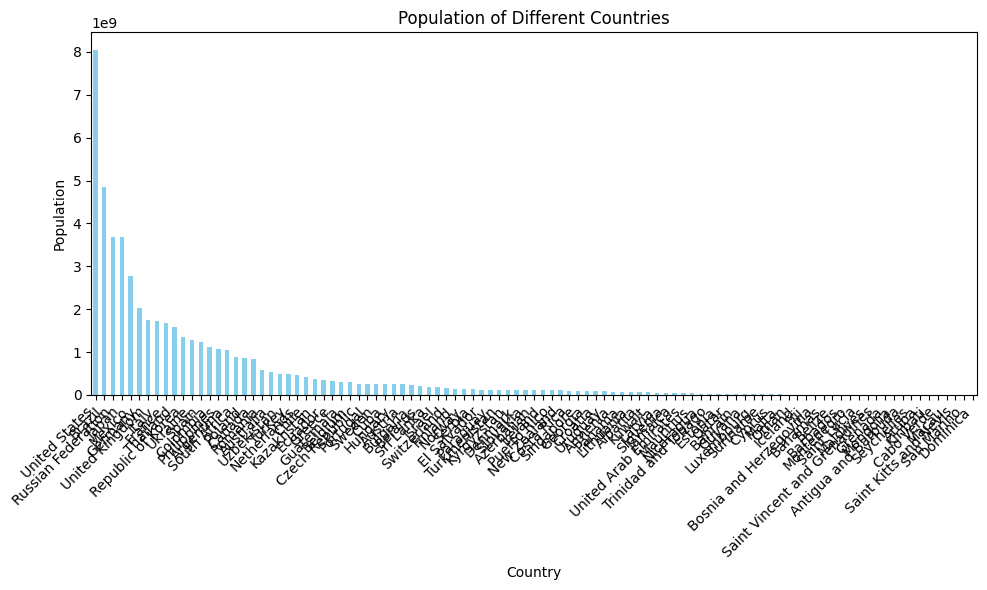

In [23]:
# Групуємо дані за країнами та сумуємо населення для кожної країни
country_population = master_data.groupby('country')['population'].sum().sort_values(ascending=False)

# Побудова діаграми
plt.figure(figsize=(10, 6))
country_population.plot(kind='bar', color='skyblue')
plt.title('Population of Different Countries')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')  # Змінити орієнтацію назв країн для кращого відображення
plt.tight_layout()
plt.show()


10 Länder_ nur für ein Jahr M: L (+) | Review: A

In [30]:
master_data[master_data['year'] == selected_year].groupby('country')['population'].sum().nlargest(10).reset_index()



,country,population
0,United States,225148000.0
1,Brazil,122822467.0
2,Japan,114416000.0
3,Mexico,67948100.0
4,Italy,54424100.0
5,United Kingdom,53239668.0
6,France,51900800.0
7,Thailand,48376410.0
8,Ukraine,47374200.0
9,Republic of Korea,38114900.0


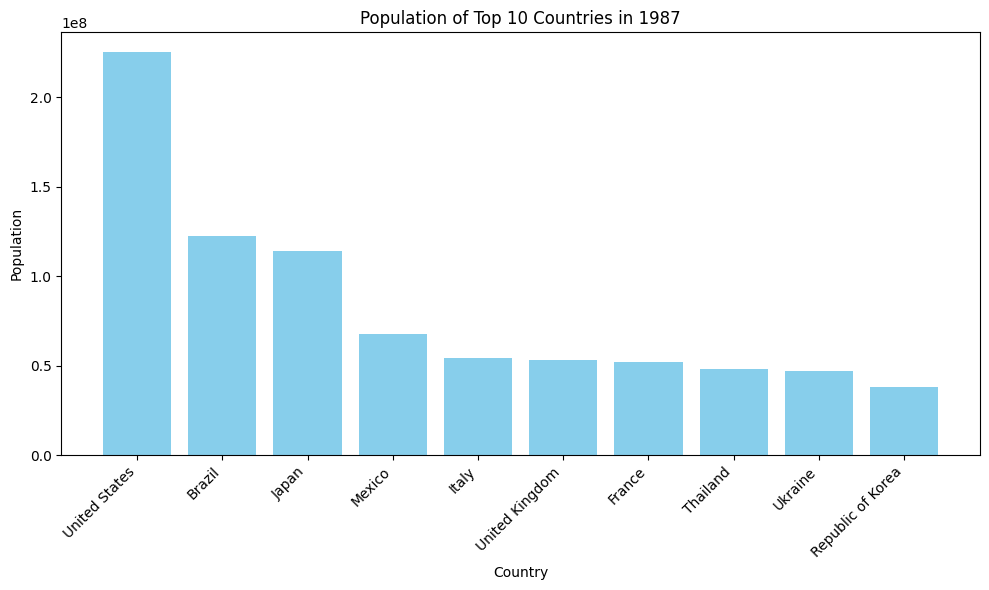

In [31]:
# Ich möchte Daten für das Jahr 2000 analysieren
selected_year = 1987

# Auswahl der Top 10 Länder für das Jahr 2000
top_countries = master_data[master_data['year'] == selected_year].groupby('country')['population'].sum().nlargest(10).reset_index()

# Pobudowa diagramy
plt.figure(figsize=(10, 6))
plt.bar(top_countries['country'], top_countries['population'], color='skyblue')
plt.title(f'Population of Top 10 Countries in {selected_year}')
plt.xlabel('Country')
plt.ylabel('Population')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

5.	Plot Frequency of different generations  with countplot M: L (+) | Review: A



5. Графік Частота різних поколінь із підрахунком

Text(0.5, 1.0, 'Generation')

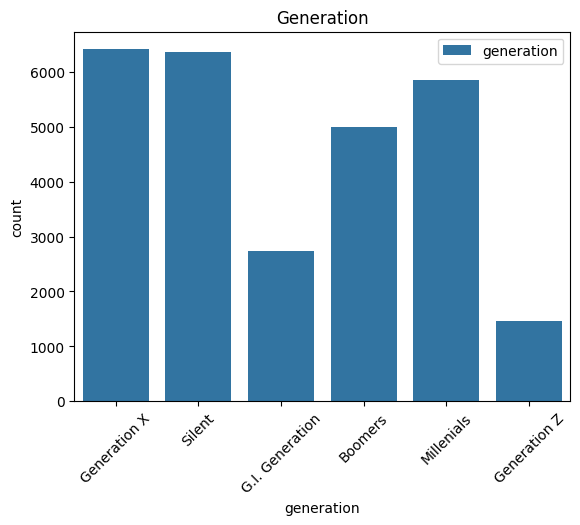

In [38]:
sns.countplot(x = 'generation', data = master_data, label = 'generation')
plt.xticks(rotation = 45)
plt.title('Generation')

In [32]:
master_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation,Unnamed: 12,Gender
0,Albania,1987,male,15-24 years,21,312900.0,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X,NaN,FEMALE
1,Albania,1987,male,35-54 years,16,308000.0,5.19,Albania1987,NaN,"2,156,624,900",796,Silent,NaN,MALE
2,Albania,1987,female,15-24 years,14,289700.0,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X,NaN,FEMALE
3,Albania,1987,male,75+ years,1,21800.0,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation,NaN,MALE
4,Albania,1987,male,25-34 years,9,274300.0,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers,NaN,MALE


6.	Plot Number of suicides in different age groups M: L (+) | Review: A

6. Графік Кількість самогубств у різних вікових групах

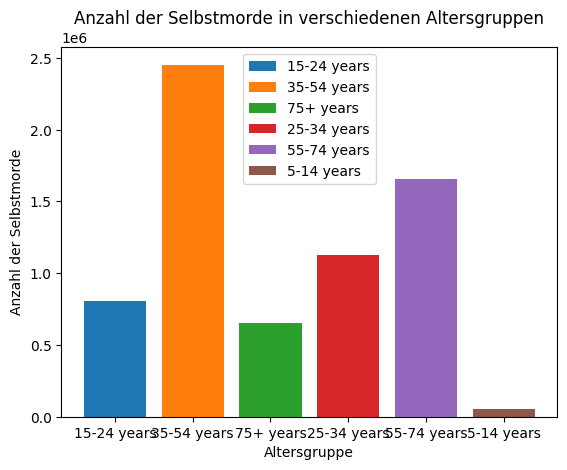

In [35]:
age_groups = master_data['age'].unique()

# Erstellen Sie Subplots 
# Створюємо підграфіки
fig, ax = plt.subplots()

# Durchlaufen Sie verschiedene Altersgruppen
# Перебираємо різні вікові групи
for age_group in age_groups:
    # Wählen Sie nur Daten für die aktuelle Altersgruppe aus
    # Вибираємо дані тільки для поточної вікової групи
    daten_für_altersgruppe = master_data[master_data['age'] == age_group]
    
    # Berechnen Sie die Gesamtanzahl der Selbstmorde für jede Altersgruppe
    # Обчислюємо загальну кількість самогубств для кожної вікової групи
    gesamt_suizide = daten_für_altersgruppe['suicides_no'].sum()
    
    # Fügen Sie eine Säule für jede Altersgruppe hinzu
    # Додаємо стовпчик для кожної вікової групи
    ax.bar(age_group, gesamt_suizide, label=age_group)

# Fügen Sie eine Legende hinzu # Додаємо легенду
ax.legend()

# Titel und Beschriftungen für das Diagramm # Заголовок і мітки для графіка
plt.title('Anzahl der Selbstmorde in verschiedenen Altersgruppen') # Кількість самогубств у різних вікових групах
plt.xlabel('Altersgruppe') # Вікова група
plt.ylabel('Anzahl der Selbstmorde') # Кількість самогубств

plt.show()


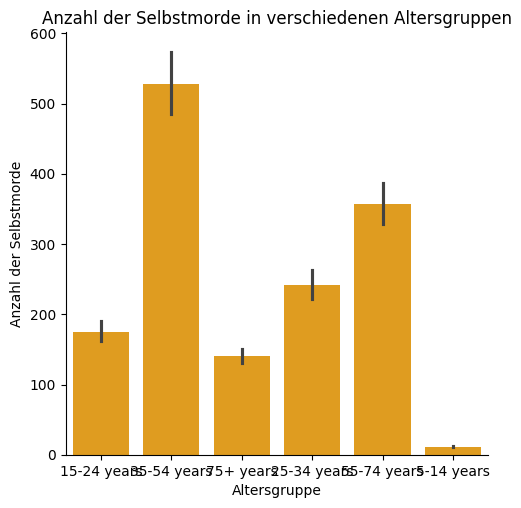

In [43]:
sns.catplot(y="suicides_no", x= "age",  data=master_data, kind="bar", color='orange')
plt.title('Anzahl der Selbstmorde in verschiedenen Altersgruppen') # Кількість самогубств у різних вікових групах
plt.xlabel('Altersgruppe') # Вікова група
plt.ylabel('Anzahl der Selbstmorde') # Кількість самогубств

plt.show()

7.	Plot Suicides each year since 2000 M: L (+) | Review: A



7. Плануйте самогубства щороку, починаючи з 2000 року

Цей код обчислює суму самогубств для кожного року, починаючи з 2000 року, та побудовує графік залежності кількості самогубств від року. 

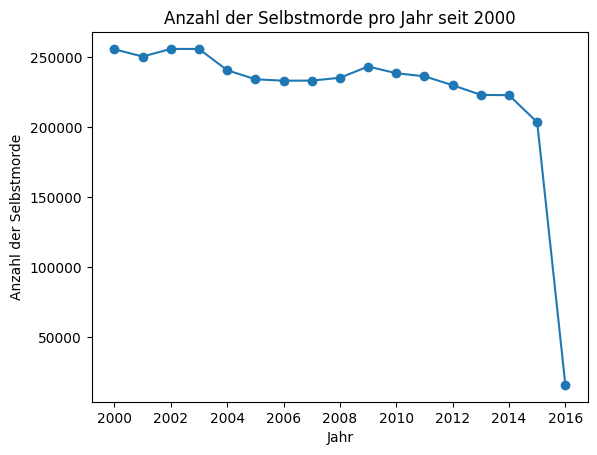

In [18]:
# Es wird angenommen, dass 'year' die Spalte mit den Jahren und 'suicides_no' die Spalte mit der Anzahl der Selbstmorde ist
## Передбачається, що 'year' - це стовпець із роками та 'suicides_no' - стовпець із кількістю самогубств
daten_ab_2000 = master_data[master_data['year'] >= 2000]

# Gruppieren Sie die Daten nach Jahren und berechnen Sie die Summe der Selbstmorde für jedes Jahr
# Групуємо дані за роками та обчислюємо суму самогубств для кожного року
selbstmorde_pro_jahr = daten_ab_2000.groupby('year')['suicides_no'].sum()

# Erstellen Sie das Diagramm # Побудова графіку
plt.plot(selbstmorde_pro_jahr, marker='o')

# Titel und Beschriftungen für das Diagramm # Заголовок і мітки для графіка
plt.title('Anzahl der Selbstmorde pro Jahr seit 2000')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Selbstmorde')

# Diagramm anzeigen
plt.show()


8.	Plot Distribution of suicides/100k pop M: L (+) | Review: A



8. Сюжет Розподіл самогубців/100 тис. поп

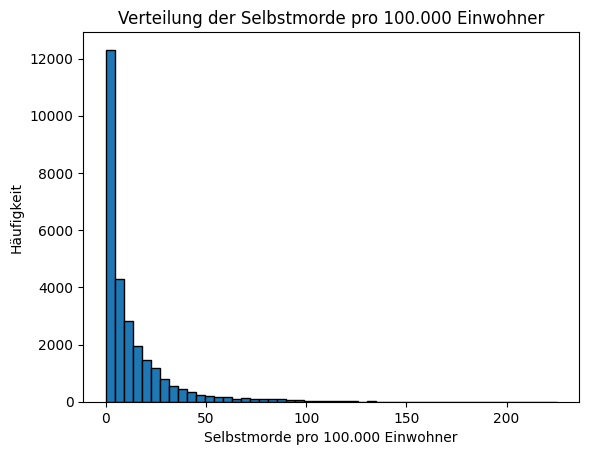

In [19]:
suicides_per_100k = master_data['suicides/100k pop']

# Erstellen Sie ein Histogramm
plt.hist(suicides_per_100k, bins=50, edgecolor='black')

# Titel und Beschriftungen für das Diagramm
plt.title('Verteilung der Selbstmorde pro 100.000 Einwohner')
plt.xlabel('Selbstmorde pro 100.000 Einwohner')
plt.ylabel('Häufigkeit')

# Diagramm anzeigen
plt.show()


9.	Top 10 Countries with maximum number of suicides M: L (+) | Review: A


9. Топ-10 країн з максимальною кількістю самогубств


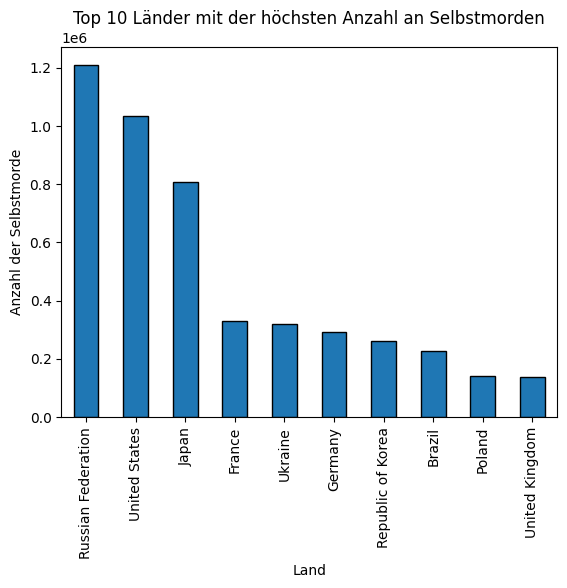

In [20]:
top_länder = master_data.groupby('country')['suicides_no'].sum().nlargest(10)

# Erstellen Sie ein Balkendiagramm
top_länder.plot(kind='bar', edgecolor='black')

# Titel und Beschriftungen für das Diagramm
plt.title('Top 10 Länder mit der höchsten Anzahl an Selbstmorden')
plt.xlabel('Land')
plt.ylabel('Anzahl der Selbstmorde')

# Diagramm anzeigen
plt.show()


10.	Change in number of suicides each year 
M: L (+) | Review: A



10. Щороку змінюється кількість самогубств

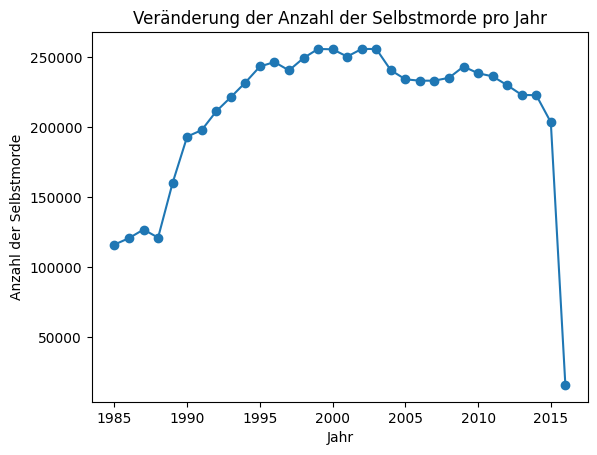

In [21]:
selbstmorde_pro_jahr = master_data.groupby('year')['suicides_no'].sum()

# Erstellen Sie ein Liniendiagramm
plt.plot(selbstmorde_pro_jahr, marker='o')

# Titel und Beschriftungen für das Diagramm
plt.title('Veränderung der Anzahl der Selbstmorde pro Jahr')
plt.xlabel('Jahr')
plt.ylabel('Anzahl der Selbstmorde')

# Diagramm anzeigen
plt.show()


11.	Change in gdp_per_capita per year M: L (+) | Review: A 

11. Зміна gdp_per_capita за рік

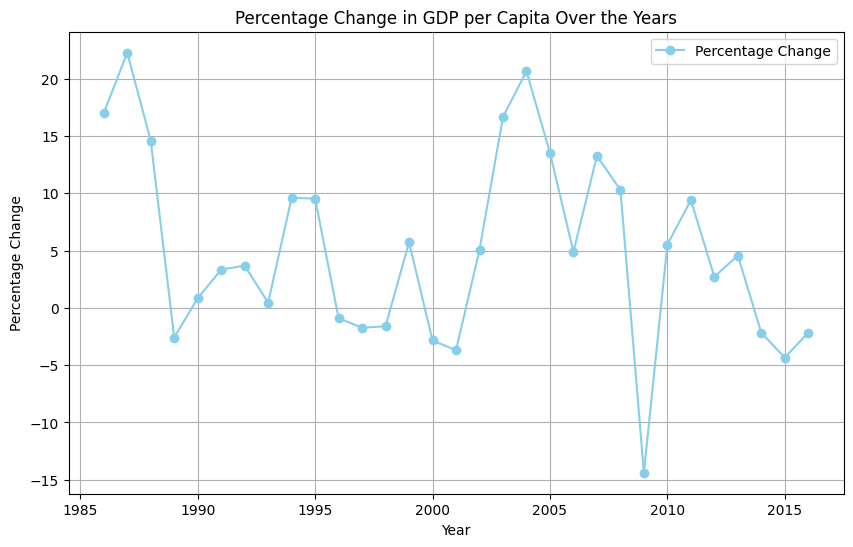

In [50]:
# Gruppieren Sie die Daten nach Jahr und berechnen Sie den Durchschnitt von gdp_per_capita für jedes Jahr
average_gdp_per_capita = master_data.groupby('year')['gdp_per_capita ($)'].mean()

# Berechnen Sie die prozentuale Änderung des durchschnittlichen gdp_per_capita im Vergleich zum Vorjahr
percentage_change = average_gdp_per_capita.pct_change() * 100

# Pobudowa diagramy mit Legende
plt.figure(figsize=(10, 6))
plt.plot(percentage_change.index, percentage_change.values, marker='o', linestyle='-', color='skyblue', label='Percentage Change')
plt.title('Percentage Change in GDP per Capita Over the Years')
plt.xlabel('Year')
plt.ylabel('Percentage Change')
plt.grid(True)
plt.legend()
plt.show()

12.	Top 10 countries with maximum number of suicides since 1985 M: L(+) | Review: A


12. Топ-10 країн з максимальною кількістю самогубств з 1985 року

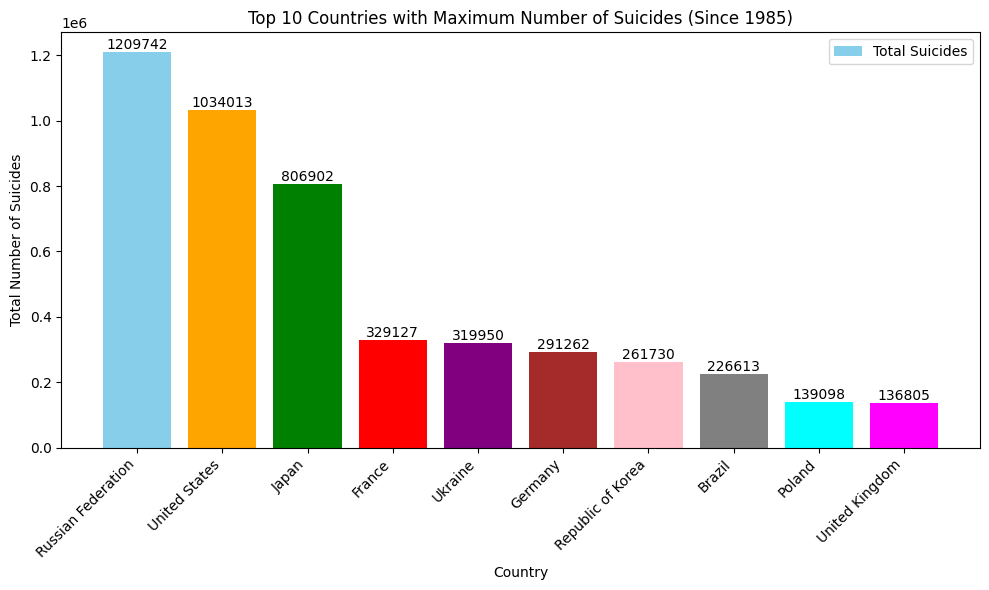

In [57]:
# Filter data for the years since 1985
filtered_data = master_data[master_data['year'] >= 1985]

# Group data by country and sum the number of suicides for each country
suicides_by_country = filtered_data.groupby('country')['suicides_no'].sum()

# Get the top 10 countries with the maximum number of suicides
top_10_countries = suicides_by_country.nlargest(10)

# Define a list of colors for each bar
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plotting the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_countries.index, top_10_countries.values, color=colors, label='Total Suicides')

plt.title('Top 10 Countries with Maximum Number of Suicides (Since 1985)')
plt.xlabel('Country')
plt.ylabel('Total Number of Suicides')
plt.xticks(rotation=45, ha='right')

# Adding legend
plt.legend()

# Display the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


13.	Top 10 countries with least number of suicides since 1985 M: L(+) | Review: A


13. Топ-10 країн з найменшою кількістю самогубств з 1985 року

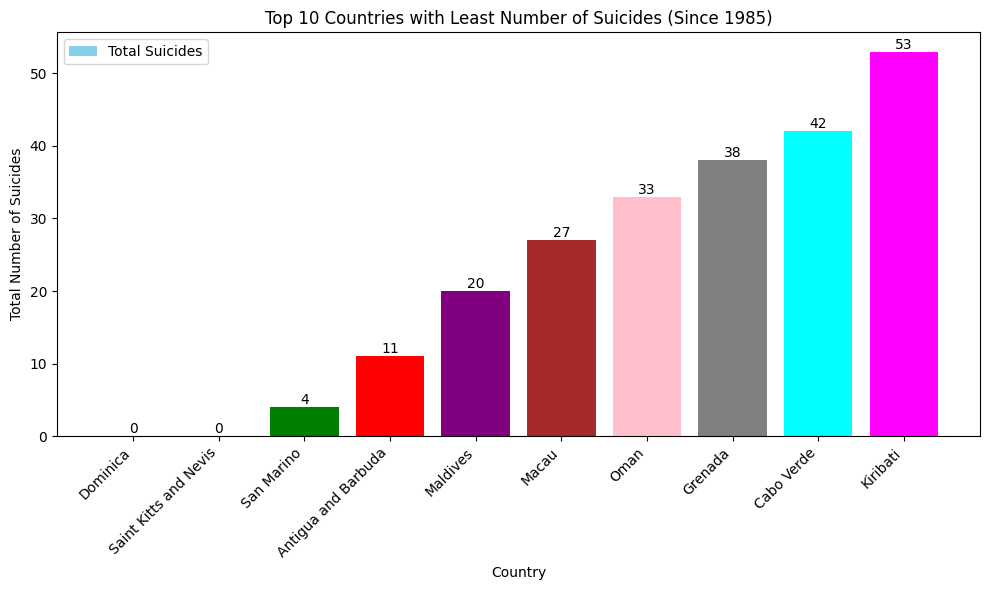

In [58]:
# Filter data for the years since 1985
filtered_data = master_data[master_data['year'] >= 1985]

# Group data by country and sum the number of suicides for each country
suicides_by_country = filtered_data.groupby('country')['suicides_no'].sum()

# Get the top 10 countries with the least number of suicides
bottom_10_countries = suicides_by_country.nsmallest(10)

# Define a list of colors for each bar
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'cyan', 'magenta']

# Plotting the bar chart with different colors for each bar
plt.figure(figsize=(10, 6))
bars = plt.bar(bottom_10_countries.index, bottom_10_countries.values, color=colors, label='Total Suicides')

plt.title('Top 10 Countries with Least Number of Suicides (Since 1985)')
plt.xlabel('Country')
plt.ylabel('Total Number of Suicides')
plt.xticks(rotation=45, ha='right')

# Adding legend
plt.legend()

# Display the values on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval), ha='center', va='bottom')

plt.tight_layout()
plt.show()


14.	Entfernen doppelter Werte  M: L(+) | Review: A 

14. Видаліть повторювані значення

In [59]:
# Entfernen Sie doppelte Zeilen basierend auf allen Spalten
unique_master_data = master_data.drop_duplicates()

# Wenn Sie nur bestimmte Spalten berücksichtigen möchten, können Sie dies angeben
# Beispiel: Entfernen Sie doppelte Zeilen basierend auf den Spalten 'country' und 'year'
unique_master_data = master_data.drop_duplicates(subset=['country', 'year'])

# Die Variable unique_master_data enthält nun Ihr DataFrame ohne doppelte Werte

In [60]:
master_data.drop_duplicates(inplace=True)


In [61]:
# Entfernen Sie doppelte Zeilen basierend auf allen Spalten
unique_master_data = master_data.drop_duplicates()

# Виведення перших 5 рядків зміненого DataFrame для перегляду
print(unique_master_data.head())

   country  year     sex          age  suicides_no  population  \
0  Albania  1987    male  15-24 years           21    312900.0   
1  Albania  1987    male  35-54 years           16    308000.0   
2  Albania  1987  female  15-24 years           14    289700.0   
3  Albania  1987    male    75+ years            1     21800.0   
4  Albania  1987    male  25-34 years            9    274300.0   

   suicides/100k pop country-year  HDI for year  gdp_for_year ($)   \
0               6.71  Albania1987           NaN      2,156,624,900   
1               5.19  Albania1987           NaN      2,156,624,900   
2               4.83  Albania1987           NaN      2,156,624,900   
3               4.59  Albania1987           NaN      2,156,624,900   
4               3.28  Albania1987           NaN      2,156,624,900   

   gdp_per_capita ($)       generation  Unnamed: 12  Gender  
0                 796     Generation X          NaN  FEMALE  
1                 796           Silent          NaN    MAL

15.	Welche Variablen sind numerisch? M: L(+) | Review: A

15. Які змінні є числовими? 

In [62]:
# Auswählen aller numerischen Spalten
numeric_columns = master_data.select_dtypes(include=['number'])

# Die Variable numeric_columns enthält nun die numerischen Spalten Ihres DataFrame
print(numeric_columns.head())

   year  suicides_no  population  suicides/100k pop  HDI for year  \
0  1987           21    312900.0               6.71           NaN   
1  1987           16    308000.0               5.19           NaN   
2  1987           14    289700.0               4.83           NaN   
3  1987            1     21800.0               4.59           NaN   
4  1987            9    274300.0               3.28           NaN   

   gdp_per_capita ($)  Unnamed: 12  
0                 796          NaN  
1                 796          NaN  
2                 796          NaN  
3                 796          NaN  
4                 796          NaN  


16.	Welche Variablen sind kategorisch?  M: L(+) | Review: A

16. Які змінні є категоріальними?

In [63]:
# Auswählen aller kategorischen Spalten
categorical_columns = master_data.select_dtypes(include=['category'])

# Die Variable categorical_columns enthält nun die kategorischen Spalten Ihres DataFrame
print(categorical_columns.head())

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4]
